# Imports

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os,re
import psycopg2 as pg2

# Test Adding to Database

In [2]:
def config():
    global database, user, password
    database = 'Sample Database'
    user = 'postgres'
    password = 'W402ibdt$$'
    
config()
#conn = pg2.connect(database = database , user = user, password = password)
#cur = conn.cursor()
#First_Name = 'Cam'
#Age = 55
#cur.execute('INSERT INTO Sample_Table(column3,column2) VALUES (%s,%s)', (First_Name, Age))
#conn.commit()
#conn.close()

## Test Printing from Database

In [3]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT * FROM Sample_Table')
data = cur.fetchall()
conn.close()

print(data)

[(1, 50, 'John', 1), (2, 50, 'Jack', 2), (3, 33, 'Ben', 3), (11, 45, 'Rem', 4), (12, 34, 'Rob', 5), (13, 55, 'Cam', 6)]


# Test Graphing 

## Test Graphing Line


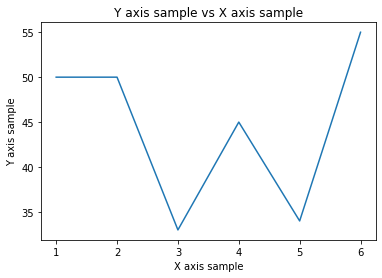

In [19]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

xaxis = 'X axis sample'
yaxis = 'Y axis sample'

#plt.errorbar
#x, y, yerr = random.randint(3, 10)
#errorbar(x, y, yerr, marker='s', mfc='red', mec='green', ms=20, mew=4)
#plt.figure()
#plt.errorbar(data1, data2, xerr=0.2, yerr=0.4)
#plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis +' ' + 'vs' + ' ' + xaxis)
plt.plot(data1, data2)
plt.show()


## Test Graphing Error Bars

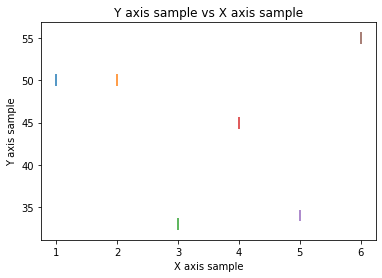

In [31]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

xaxis = 'X axis sample'
yaxis = 'Y axis sample'

#plt.errorbar
#x, y, yerr = random.randint(3, 10)
#errorbar(x, y, yerr, marker='s', mfc='red', mec='green', ms=20, mew=4)
#plt.figure()

N = len(data1)

for i in range (0, N):
    plt.errorbar(data1[i], data2[i], xerr=0, yerr=.7)
#plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis +' ' + 'vs' + ' ' + xaxis)
plt.show()

## Test Graph with points

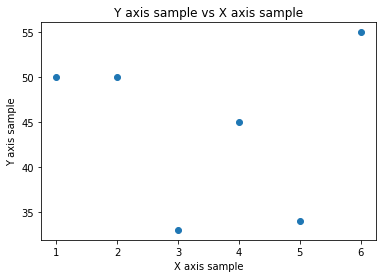

In [11]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4, column2 FROM Sample_Table')
data = cur.fetchall()
conn.close()

xaxis = 'X axis sample'
yaxis = 'Y axis sample'
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis +' ' + 'vs' + ' ' + xaxis)
plt.scatter(*zip(*data))
plt.show()

## Graph with points and error bars

Text(0.5, 1.0, 'Y axis sample vs X axis sample')

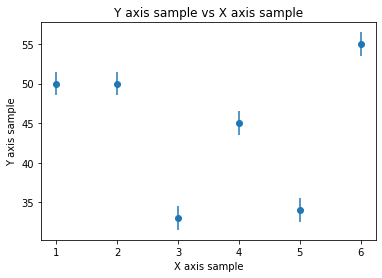

In [58]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column4 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

x = data1
y = data2
N = len(data1)

for i in range (0, N):
    plt.errorbar(x[i], y[i], xerr=0, yerr=1.5, color = 'tab:blue')

plt.scatter(data1, data2)
xaxis = 'X axis sample'
yaxis = 'Y axis sample'
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title(yaxis + ' ' + 'vs' + ' ' + xaxis)


# Graphing from Raees Database

## Data from 2020-11-30